In [89]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# import gmaps
# import gmaps.datasets

# google_key = open('../../../../Documents/google_api').read()
# gmaps.configure(api_key=google_key)

In [91]:
# data = gmaps.datasets.load_dataset('taxi_rides')
# m = gmaps.Map()
# m.add_layer(gmaps.Heatmap(data=data))


In [143]:
hospital_chosen_zip = pd.read_csv('../data/hospital_chosen_zip.csv', sep='|')
hospital_no_nan = hospital_chosen_zip.dropna()
grouped_hospital = hospital_chosen_zip.groupby('zip')
group_names = grouped_hospital.groups.keys()

85020


<AxesSubplot:>

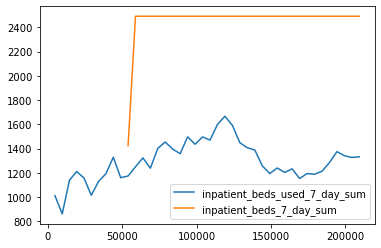

In [93]:
group_names = list(group_names)

g = random.choice(group_names)
print(g)
grouped_hospital.get_group(g)[['inpatient_beds_used_7_day_sum', 'inpatient_beds_7_day_sum']].plot()

''

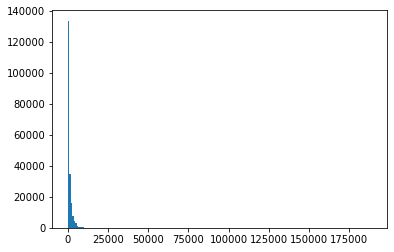

In [94]:
fig, ax = plt.subplots()
ax.hist(hospital_chosen_zip['all_adult_hospital_beds_7_day_sum'], bins=200)
;

In [166]:
hospital_gb_date = hospital_chosen_zip.groupby('collection_week')
hospital_gb_sum = hospital_gb_date.aggregate(np.sum)
hospital_gb_sum

,Unnamed: 0,zip,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,...,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,icu_patients_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum,percent_inpatient_beds
collection_week,,,,,,,,,,,,,,,,,,,,,
2020/07/31,11938941,264928611,5205279.0,4122767.0,3664788.0,3022951.0,2597087.0,403833.0,307063.0,13118.0,...,671650.0,488753.0,458696.0,347807.0,116573.0,99320.0,0.0,0.0,0.0,NaN
2020/08/07,35909712,265664992,5447521.0,4284154.0,3793812.0,3110909.0,2692730.0,374739.0,285847.0,12658.0,...,686326.0,494720.0,460575.0,348551.0,109109.0,91873.0,0.0,0.0,0.0,NaN
2020/08/14,59191743,262436442,5447796.0,4343641.0,3844464.0,3136333.0,2722571.0,337687.0,262029.0,12655.0,...,692053.0,500588.0,464706.0,393253.0,100132.0,82894.0,0.0,0.0,0.0,-inf
2020/08/21,82938382,263688727,5427433.0,4476219.0,3917320.0,3174029.0,2750772.0,310051.0,235736.0,10686.0,...,687757.0,514261.0,466717.0,361608.0,88062.0,72496.0,0.0,0.0,0.0,-inf
2020/08/28,107567037,265475793,5565891.0,4543554.0,3993330.0,3180366.0,2794829.0,282641.0,214067.0,9899.0,...,701260.0,526132.0,472569.0,369172.0,81776.0,66637.0,0.0,0.0,0.0,NaN
2020/09/04,132153455,265924157,5590542.0,4629648.0,4037418.0,3156529.0,2773507.0,263119.0,197857.0,9348.0,...,705931.0,530941.0,470256.0,367862.0,76521.0,62713.0,0.0,0.0,0.0,inf
2020/09/11,156403933,266005909,5659444.0,4717795.0,4103010.0,3282928.0,2890684.0,247152.0,180801.0,8362.0,...,712511.0,539340.0,478164.0,378480.0,70511.0,57158.0,0.0,0.0,0.0,NaN
2020/09/18,180708338,266171921,5686567.0,4767753.0,4139957.0,3304527.0,2915374.0,239345.0,179405.0,5164.0,...,709885.0,539348.0,476435.0,376556.0,68259.0,54511.0,0.0,0.0,0.0,inf
2020/09/25,205968345,266725447,5757374.0,4887505.0,4207295.0,3359735.0,2985546.0,248307.0,186035.0,5117.0,...,713196.0,546742.0,487515.0,389494.0,69044.0,55766.0,0.0,0.0,0.0,inf


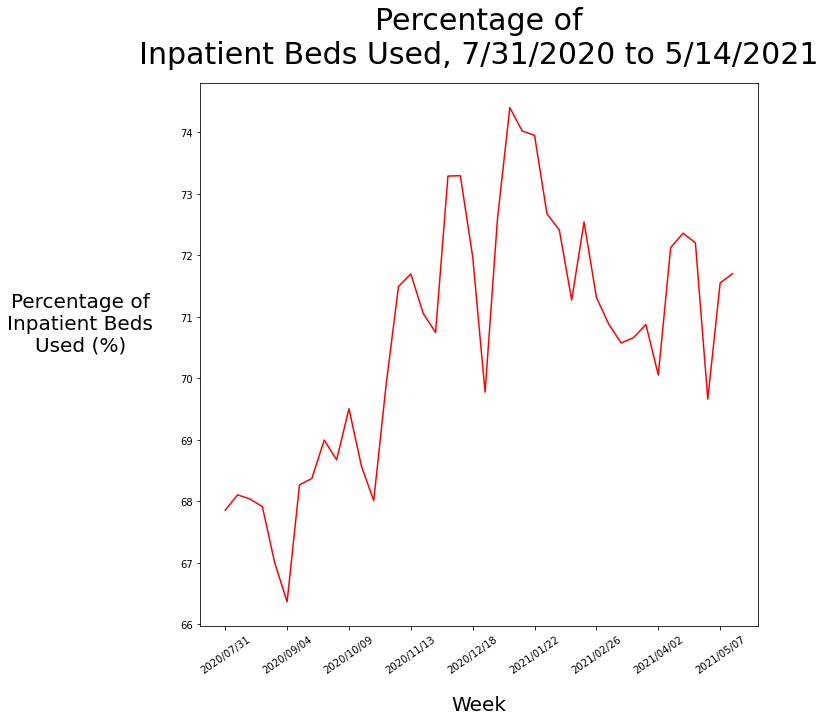

In [131]:
x = np.array(hospital_gb_sum.index)
y = (hospital_gb_sum['inpatient_beds_used_7_day_sum'] / hospital_gb_sum['inpatient_beds_7_day_sum']) * 100
figure_size = (10,10)

fig, ax = plt.subplots(figsize=figure_size)
ax.plot(x, y, color='red')
ax.set_title('Percentage of\nInpatient Beds Used, 7/31/2020 to 5/14/2021', size=30, pad=20)
ax.set_xlabel('Week', size=20, labelpad=20)
ax.set_ylabel('Percentage of\nInpatient Beds\nUsed (%)', rotation=0, size=20, labelpad=100)
ax.set_xticks(x[::5])
plt.xticks(rotation='35');

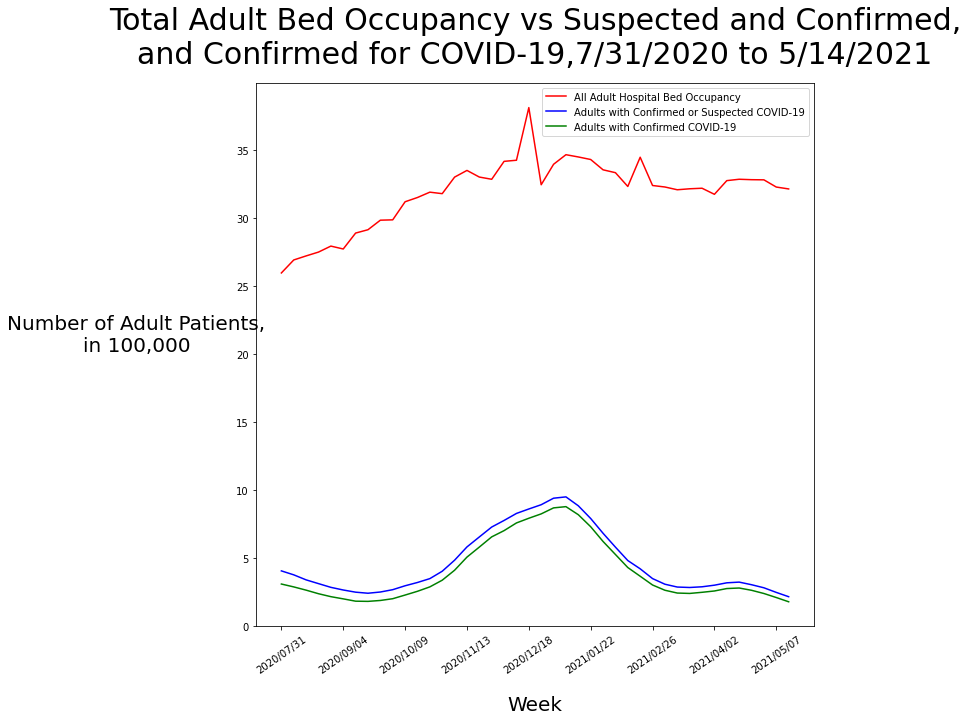

In [172]:
x = np.array(hospital_gb_sum.index)
y = hospital_gb_sum['all_adult_hospital_inpatient_bed_occupied_7_day_sum'] / 100000
y_2 = hospital_gb_sum['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'] / 100000
y_3 = hospital_gb_sum['total_adult_patients_hospitalized_confirmed_covid_7_day_sum'] / 100000

fig, ax = plt.subplots(figsize=figure_size)
ax.plot(x, y, color='red', label='All Adult Hospital Bed Occupancy')
ax.plot(x, y_2, color='blue', label='Adults with Confirmed or Suspected COVID-19')
ax.plot(x, y_3, color='green', label='Adults with Confirmed COVID-19')
ax.set_title('Total Adult Bed Occupancy vs Suspected and Confirmed,\nand Confirmed for COVID-19,7/31/2020 to 5/14/2021', size=30, pad=20)
ax.set_xlabel('Week', size=20, labelpad=20)
ax.set_ylabel('Number of Adult Patients,\nin 100,000', rotation=0, size=20, labelpad=100)
ax.set_xticks(x[::5])
ax.legend()
plt.xticks(rotation='35');